# Group 1

## 1. 1-6 基于L1-2度量的鲁棒主成分分析方法

### 摘要

鲁棒主成分分析（RPCA）是一种新兴的方法，专门用于准确恢复被破坏的低秩矩阵。对于给定的数据矩阵，RPCA可以将其精确分解为低秩矩阵和稀疏矩阵的和，这一过程通过最小化核范数和L1范数的加权组合来完成。该方法假设错误矩阵是稀疏的，并使用L1范数来衡量。然而，L1范数常常导致估计有偏差，解决方案的准确性不如预期。近期提出了一种称为L1-2度量的方法，这是L1和L2范数的差异，作为对L0范数的近似。基于L1-2度量比凸L1范数更好地近似L0范数的优点，本文提出了一种基于L1-2度量的鲁棒主成分分析方法（RPCA-L1-2），用于恢复受损数据。这种方法通过L1-2度量来衡量数据误差。此外，RPCA-L1-2的解决方案是通过差分凸函数（DC）编程来实现的。在从人脸图像中移除遮挡和从监控视频中建模背景的广泛实验中，展示了所提方法的有效性。

### 算法

### 2. 相关工作
给定一个数据集 $\mathbf{X}=[\mathbf{x}_{1},\mathbf{x}_{2},...,\mathbf{x}_{s}]$，其中每个 $\mathbf{x}_{i}$ 是一个样本。矩阵X的核范数定义为 $\|\mathbf{X}\|_{*}=\sum_{i}\sigma_{i}$，即X的奇异值之和。此外，矩阵X的$L_2$范数和$L_1$范数分别由 $\|\mathbf{X}\|_{F}= \sqrt{\sum_{i, j}(\mathbf{X}_{ij})^2}$ 和 $\|\mathbf{X}\|_{\mathrm{n}}= \sum_{i, j}|\mathbf{X}_{ij}|$ 定义，其中 $\mathbf{X}_{ij}$ 表示第$(i,j)$个元素。
#### 2.1. RPCA
数据X通常是受损的。RPCA试图将X分解为两个矩阵 $\mathbf{D}$ 和E，其中矩阵D假设具有低秩，而E假设是稀疏的。分解模型给出如下：
$$\min_{\mathbf{D,E}}\parallel\mathbf{D}\parallel_*+\lambda\parallel\mathbf{E}\parallel_1\quad\mathrm{s.t.}\:\mathbf{X}=\mathbf{D}+\mathbf{E}\:.$$
存在许多解决RPCA模型的算法，例如不完全增广拉格朗日乘数算法（不完全ALM）和加速邻近梯度方法。
#### 2.2. L1-2度量
向量的$l_{1-2}$度量最初在非负最小二乘问题的背景下提出，并随后应用于压缩感知问题。对于向量$\mathbf{x}$，其$l_1-2$度量定义为 $\parallel \mathbf{x} \parallel _{\mathrm{l}} - \parallel \mathbf{x} \parallel _{\mathrm{2}}$。同样地，对于矩阵X，可以定义其$L_{1-2}$度量为：
$$\parallel\mathbf{X}\parallel_{1-2}\triangleq\parallel\mathbf{X}\parallel_{1}-\parallel\mathbf{X}\parallel_{F}\:.$$

## 2.3. DC编程
“DC”表示“凸函数之差”。DC编程是一种特殊的优化方法，其目标函数可以分解为两个凸函数之差。DC编程的形式如下：
$$\min\{f(x)=g(x)-h(x):x\in \mathbb{R}^{n}\}$$
其中 $g,h$ 是凸函数。这样的函数$f$被称为DC函数，g-h是$f$的DC分解，而g和$h$是$f$的DC组成部分。DC算法的构建涉及DC组成部分g和$h$，而不是函数$f$本身。DC算法在算法1中总结，其中使用一阶近似来代替非凸部分。

### 3.1. 模型
受向量在压缩感知问题中对$l_0$范数更好的近似$I_{1-2}$度量的启发，本文将向量的$I_{1-2}$度量扩展到矩阵的$L_{1-2}$度量，并应用于恢复受损数据。提出的方法称为基于$L_{1-2}$度量的鲁棒主成分分析（RPCA-$L_1-2$），其公式化如下：
$$\min_{\mathbf{D},\mathbf{E}}\parallel\mathbf{D}\parallel_*+\lambda\parallel\mathbf{E}\parallel_{1-2}\quad\mathrm{s.t.}\quad\mathbf{X}=\mathbf{D}+\mathbf{E}$$
RPCA-$L_1.2$ 通过$L_{1.2}$度量而非RPCA中的$L_1$度量来衡量数据误差。
### 3.2. 算法
优化（4）等价于：
$$\min_{\mathbf{E}}F(\mathbf{E})-G(\mathbf{E}),$$
其中 $F(\mathbf{E})$ 和 $G(\mathbf{E})$ 是由以下定义的两个凸函数：
$$\begin{cases}F(\mathbf{E})=\parallel\mathbf{X}-\mathbf{E}\parallel_*+\lambda\parallel\mathbf{E}\parallel_1\\G(\mathbf{E})=\lambda\parallel\mathbf{E}\parallel_F\end{cases}.$$
这里 $F,G$ 是凸函数。可以采用DC算法来解决（5）。相应的算法在算法2中总结。

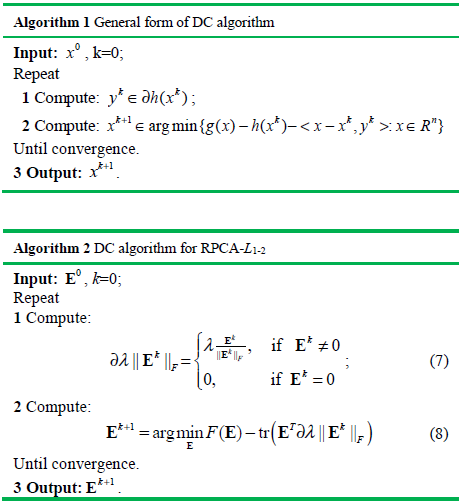

在第 $k$ 步，如果 $\mathbf{E}^{k}=0$，那么 (8) 是RPCA问题，可以通过不完全增广拉格朗日乘数算法（inexact ALM）解决。如果 $\mathbf{E}^k \neq 0$，问题 (8) 也可以通过不完全ALM解决。在这种情况下，(8)的增广拉格朗日函数为：
$$\begin{aligned}
L_{\mu}(\mathbf{D},\mathbf{E},\mathbf{Y})=&\parallel\mathbf{D}\parallel_{*}+\lambda\parallel\mathbf{E}\parallel_{1}-\mathrm{tr}\left(\mathbf{E}^{T}\partial\lambda\parallel\mathbf{E}^{k}\parallel_{F}\right)\\
&+\:Tr(\mathbf{Y}^{T}(\mathbf{X}-\mathbf{D}-\mathbf{E}))+\frac{\mu}{2}\parallel\mathbf{X}-\mathbf{D}-\mathbf{E}\parallel_{F}^{2}
\end{aligned}$$
其中 $\mathbf{Y}$ 是拉格朗日乘子，$\mu$ 是惩罚参数。然后，(8) 可以通过交替更新 $\mathbf{D}, \mathbf{E}, \mathbf{Y}$ 来解决。更新 $\mathbf{D}$ 和 $\mathbf{Y}$ 与RPCA一致。固定 $\mathbf{D}$ 和 $\mathbf{Y}$ 时，$\mathbf{E}$ 可以通过优化增广拉格朗日函数更新。优化可以写为（10）：
$$\operatorname*{min}_{\mathbf{E}}\lambda\parallel\mathbf{E}\parallel_{1}-Tr\bigg[\bigg(\mathbf{Y}+\partial\lambda\parallel\mathbf{E}^{k}\parallel_{F}\bigg)^{T}\mathbf{E}\bigg],\\+\frac{\mu}{2}\parallel\mathbf{X}-\mathbf{D}-\mathbf{E}\parallel_{F}^{2}$$
等价地重写为：
$$\min_{\mathbf{E}}\lambda\parallel\mathbf{E}\parallel_1+\frac{\mu}{2}\Big\Vert\mathbf{X}-\mathbf{D}+\frac{1}{\mu}\Big(\mathbf{Y}+\partial\lambda\parallel\mathbf{E}^k\parallel_F\Big)-\mathbf{E}\Big\Vert_F^2.$$
(11)的解可以给出为：
$$S_{\frac{\lambda}{\mu}}\left(\mathbf{X}-\mathbf{D}+\frac{1}{\mu}\Big(\mathbf{Y}+\partial\lambda\parallel\mathbf{E}^{k}\parallel_{F}\Big)\right),$$
其中 $S_{\varepsilon}(\cdot)$ 是软阈值操作符，定义为：
$$S_{\varepsilon}(x)\triangleq\begin{cases}x-\varepsilon,\text{if}x>\varepsilon,\\x+\varepsilon,\text{if}x<-\varepsilon,\\0,&\text{otherwise.}\end{cases}$$
(13)


## 2. 1-7 计算与理论分析空间和正交线性判别分析

降维是许多应用中的重要预处理步骤。线性判别分析（LDA）是一种用于监督降维的经典统计方法。它旨在最大化类间距离与类内距离之比，从而最大化类别的区分度。它已被广泛应用于许多领域。然而，经典LDA公式需要涉及的散布矩阵非奇异。对于欠采样问题，数据维度远大于样本量时，所有散布矩阵都是奇异的，此时经典LDA失效。为了克服这个问题，过去提出了许多扩展方法，包括零空间LDA（NLDA）和正交LDA（OLDA）。NLDA旨在最大化类间距离，在类内散布矩阵的零空间中，而OLDA通过同时对方差矩阵进行对角化计算一组正交判别向量。它们已在各种应用中得到成功应用。在本文中，我们提供了NLDA和OLDA的计算和理论分析。我们的主要结果表明，在许多涉及高维数据的应用中，NLDA在温和的条件下等同于OLDA。我们在各种类型的数据上进行了广泛实验，结果与我们的理论分析一致。我们进一步将正则化应用于OLDA。该算法称为正则化OLDA（简称ROLDA）。提出了一个高效算法来估计ROLDA中的正则化值。在分类方面的比较研究表明，ROLDA与OLDA非常具有竞争力。这证实了ROLDA中正则化的有效性。

   
## 3. 1-7 MMC 高效鲁棒的特征提取通过最大间距准则

在模式识别中，特征提取技术被广泛应用于降低数据的维度并增强差异性信息。主成分分析（PCA）和线性判别分析（LDA）是两种最受欢迎的线性降维方法。然而，PCA在提取最具判别力的特征方面并不非常有效，而LDA由于小样本问题而不稳定。在本文中，我们提出了一些基于最大边缘准则（MMC）的新的（线性和非线性）特征提取器。从几何角度看，基于MMC的特征提取器在降维后最大化了类别间的（平均）边缘。研究表明，MMC比PCA更能代表类别的可分离性。作为与LDA的联系，我们也可以通过引入一些约束从MMC推导出LDA。通过使用其他一些约束，我们建立了一个新的线性特征提取器，该提取器不受小样本问题的影响，而这个问题已知会导致LDA的严重稳定性问题。本文还建立了这种线性特征提取器的核化（非线性）对应物。我们的广泛实验表明，这些新的特征提取器是有效的、稳定的和高效的。

## 4. 1-8 LDA 局部适应性判别分析

线性判别分析（LDA）是一种常用的监督式降维技术，在处理高斯分布数据时表现良好。然而，由于忽略了局部数据结构，使得LDA在许多实际情况下无法适用。因此，一些研究关注于邻近点之间的判别分析，这些方法往往会受到原始数据空间中噪声的影响。本文提出了一种新的监督式降维方法，称为局部自适应判别分析（LADA），用于学习数据的代表性子空间。与LDA及其变体相比，该方法具有三个显著优势：（1）在不对数据分布做任何假设的情况下，找到主要投影方向；（2）能够在所需子空间中利用数据的局部流形结构；（3）自动利用点之间的邻居关系，无需引入任何额外的需要调整的参数。在合成数据集和实际基准数据集上的性能表明了该方法的优越性。

# Group 2

## 2-2 通过联合 L21 范数最小化实现高效且稳健的特征选择

特征选择是许多机器学习应用中的重要组成部分。特别是在许多生物信息学任务中，需要高效而稳健的特征选择方法来提取有意义的特征并消除噪声。在本文中，我们提出了一种新的鲁棒特征选择方法，强调了对损失函数和正则化的联合2,1-范数最小化。基于2,1-范数的损失函数对数据点中的异常值具有鲁棒性，而2;1-范数正则化则在所有数据点上选择具有联合稀疏性的特征。我们引入了一个高效的算法，并证明了其收敛性。我们基于回归的目标使得特征选择过程更加高效。我们的方法已应用于基因组和蛋白组标志物的发现。我们对六个数据集进行了广泛的实证研究，以展示我们的特征选择方法的性能。
## 2-3 基于 L21 范数正则化的无监督判别特征选择

与监督学习中的特征选择相比，在无监督学习中选择具有判别性的特征更为困难，因为缺乏标签信息。传统的无监督特征选择算法通常选择最能保持数据分布的特征，例如，整个特征集的流形结构。在假设输入数据的类标签可以通过线性分类器预测的前提下，我们将判别分析和`2,1-范数最小化纳入一个联合框架中，用于无监督特征选择。与现有的无监督特征选择算法不同，我们的算法以批处理模式从整个特征集中选择最具判别力的特征子集。对不同数据类型的广泛实验展示了我们算法的有效性。

## 2-4 谱回归：稀疏子空间学习的统一方法

最近，维度约简（或者说子空间学习）的问题在信息处理的许多领域中引起了广泛的关注，包括数据挖掘、信息检索和模式识别。一些流行的方法包括主成分分析（PCA）、线性判别分析（LDA）和局部保持投影（LPP）。然而，所有这些方法的一个缺点是学习到的投影函数是所有原始特征的线性组合，因此通常很难解释结果。在本文中，我们提出了一种新颖的维度约简框架，称为统一稀疏子空间学习（USSL），用于学习稀疏投影。USSL将学习投影函数的问题转化为一个回归框架，这有利于使用不同类型的正则化器。通过使用L1范数正则化器（套索），可以有效地计算稀疏投影。在真实世界的分类和聚类问题上的实验结果证明了我们方法的有效性。


## 2-5 高效的核判别分析通过谱回归

线性判别分析（LDA）一直是一种流行的方法，用于提取保留类别可分性的特征。通过最大化类间协方差和同时最小化类内协方差来获得投影向量。LDA可以在原始输入空间中执行，也可以在数据点被映射的再生核希尔伯特空间（RKHS）中执行，这导致了核判别分析（KDA）。当数据高度非线性分布时，KDA的表现可能优于LDA。然而，在KDA中计算投影函数涉及到核矩阵的特征分解，这在训练样本数量众多时非常耗费资源。在本文中，我们提出了一种新的核判别分析算法，称为谱回归核判别分析（SRKDA）。通过使用谱图分析，SRKDA将判别分析转化为一个回归框架，便于高效计算和使用正则化技术。具体来说，SRKDA只需要解决一系列正则化回归问题，并且不涉及特征向量计算，这大大节省了计算成本。我们的计算分析显示，SRKDA比普通的KDA快27倍。此外，新的公式化使得非常容易开发算法的增量版本，可以充分利用现有训练样本的计算结果。面部识别的实验表明了所提算法的有效性和高效性。

# Group 3

## 3-4 核岭回归分类

我们提出了一种最近邻的非线性子空间分类器，将岭回归分类方法扩展到核版本，称为核岭回归分类（KRRC）。核方法通常被认为能够有效地发现数据流形的非线性结构。KRRC的基本思想是通过使用核技巧将观察到的数据隐式映射到可能高得多的特征空间，并在特征空间中执行岭回归分类。在这个新的特征空间中，来自单个对象类别的样本可能位于线性子空间上，这样一个新的测试样本可以表示为类别特定图库的线性组合，然后使用新测试样本与类别特定子空间之间的最小距离进行分类。我们在合成数据集和一些UCI基准数据集上的实验研究证实了所提方法的有效性。

## 3-5 核判别分析用于回归问题

本文提出了一种用于回归问题的非线性特征提取方法，以降低输入空间的维度。先前提出了一种特征提取方法LDAr，这是线性判别分析的一个回归版本。在本文中，通过使用所谓的核技巧，将LDAr推广到非线性判别分析。基本思想是将输入空间映射到高维特征空间，其中变量是输入变量的非线性变换。然后，我们试图在特征空间中最大化具有目标值差异较大和目标值差异较小的样本之间的距离比。众所周知，在可感知的平移、旋转和缩放变化下，人脸图像的分布是高度非线性的，而人脸对齐问题是一个复杂的回归问题。我们将所提方法应用于包括人脸对齐问题在内的各种回归问题，并取得了比传统线性特征提取方法更好的性能。

## 3-6 监督核局部保持投影用于人脸识别

本文提出了一种新的子空间方法，称为监督核局部保持投影（SKLPP），用于人脸识别，在这种方法中，根据先前的类别标签信息保留几何关系，并通过非线性核映射表示实际人脸图像的复杂非线性变化。SKLPP不仅可以获得人脸流形的完美逼近，还可以增强类内局部关系。实验结果表明，所提方法可以提高人脸识别的性能。

## 3-3 带核的Fisher判别分析

提出了一种基于Fisher判别的非线性分类技术。主要组成部分是核技巧，它允许在特征空间中有效计算Fisher判别。在特征空间中的线性分类对应于输入空间中的（强大的）非线性决策函数。大规模模拟实验证明了我们方法的竞争力。

# Group 4

## 4-3 通过局部线性嵌入的非线性降维

许多科学领域依赖于探索性数据分析和可视化。分析大量多变量数据的需求引发了一个基本问题：维度约简——如何发现高维数据的紧凑表示。这里，我们介绍了一种无监督学习算法——局部线性嵌入（LLE），它计算高维输入的低维、保持邻域的嵌入。与局部维度减少的聚类方法不同，LLE将其输入映射到一个单一的全局坐标系统中，该系统的维度较低，且其优化不涉及局部最小值。通过利用线性重建的局部对称性，LLE能够学习非线性流形的全局结构，如人脸图像或文本文档生成的流形。

## 4-4 拉普拉斯特征映射

机器学习和模式识别中的一个核心问题是为复杂数据开发适当的表示。我们考虑构建一个数据表示的问题，这些数据位于嵌入高维空间中的低维流形上。基于图拉普拉斯算子、流形上的拉普拉斯-贝尔特拉米算子以及与热方程的联系，我们提出了一个几何驱动的算法来表示高维数据。该算法提供了一种计算效率高的方法来进行非线性维度减少，它具有保持
局部性的特性和与聚类的自然连接。讨论了一些潜在应用和示例。

## 4-5 正交邻域保持投影

本文考虑了通过正交投影技术进行维度减少的问题。所提出技术的主要特点是它们试图同时保留数据样本的固有邻域几何和全局几何。特别地，我们提出了一种方法，命名为正交邻域保持投影（ONPP），该方法首先为数据构建一个“亲和性”图，其方式类似于局部线性嵌入（LLE）的方法。然而，与标准LLE的隐式映射不同，ONPP采用两者之间的显式线性映射。因此，处理新的数据样本变得简单，因为这相当于一个简单的线性变换。我们展示了如何定义ONPP的核变体，以及如何在监督设置中应用该方法。报告了数值实验以说明ONPP的性能，并与一些竞争方法进行比较。

## 4-6 黎曼流形学习

最近，流形学习在模式识别、数据分析和机器学习中被广泛利用。本文提出了一种新的框架，称为黎曼流形学习（RML），基于假设输入的高维数据位于本质上低维的黎曼流形上。主要思想是将维度减少问题表述为黎曼几何中的一个经典问题，即如何为给定的黎曼流形构建坐标图？我们为一组无组织的数据点实现了在黎曼几何中最广泛使用的黎曼正常坐标图。首先，基于对底层流形的有效单纯形重建，估计两个输入参数（邻域大小k和内在维度d）。然后，计算正常坐标以将输入的高维数据映射到低维空间。在合成数据和现实世界图像上的实验表明，我们的算法可以学习数据的内在几何结构，保留径向测地距离，并产生规则的嵌入。

# Group 5

## 5-1 使用拉普拉斯脸的局部保持投影(LPP)进行面部识别(LPP-face)

我们提出了一种基于外观的面部识别方法，称为拉普拉斯脸方法。通过使用局部保持投影（LPP），面部图像被映射到一个面部子空间进行分析。与主成分分析（PCA）和线性判别分析（LDA）只有效看到面部空间的欧几里得结构不同，LPP找到了一个保持局部信息的嵌入，并获得了一个最佳检测面部流形结构的面部子空间。拉普拉斯脸是对面部流形上拉普拉斯-贝尔特拉米算子的特征函数的最优线性逼近。通过这种方式，可以消除或减少由于光照、面部表情和姿势变化引起的不希望的变化。理论分析表明，PCA、LDA和LPP可以从不同的图模型中获得。我们将提出的拉普拉斯脸方法与Eigenface和Fisherface方法在三个不同的面部数据集上进行比较。实验结果表明，提出的拉普拉斯脸方法提供了更好的表示，并在面部识别中实现了更低的错误率。


## 5-2 二维局部保持投影的扩展(LPP-2DLPP)

我们考虑了二维意义上的局部保持投影（LPP）问题。最近，LPP被提出用于降维，可以检测数据的内在流形结构并保持局部信息。对于矩阵数据，如图像，通常被向量化以便LPP算法找到内在流形结构。然而，矩阵数据的维度通常很高，由于矩阵的奇异性，LPP无法实现。在本文中，我们提出了一种名为二维局部保持投影（2D-LPP）的图像识别方法，该方法直接基于2D图像矩阵而不是传统LPP的1D向量。从代数程序中，我们推断出2D-LPP与直接基于图像矩阵的两种其他线性投影方法有关，即2D-PCA和2D-LDA。2D-PCA和2D-LDA保持了图像空间的欧几里得结构，而2D-LPP找到了一个保持局部信息的嵌入并检测到内在图像流形结构。为了评估2D-LPP的性能，我们在ORL面部数据库、耶鲁面部数据库和一个数字数据集上进行了几项实验。高识别率和速度表明，2D-LPP的性能优于2D-PCA和2D-LDA。实验甚至显示，在特征空间的相同维度下，进行2D-LPP后的PCA识别率高于LPP。

## 5-3 局部判别嵌入及其变体(LPP-LDE)

我们提出了一种新方法，称为局部判别嵌入（LDE），用于流形学习和模式分类。在我们的框架中，使用数据的邻域和类别关系来构建分类问题的嵌入。所提算法通过解决优化问题来学习每个类别的子流形的嵌入。在嵌入到低维子空间后，同一类别的数据点保持其固有的邻域关系，而不同类别的相邻点不再紧密相连。通过嵌入，新的测试数据因其局部区分特性而更可靠地被最近邻规则分类。我们还描述了两个有用的变体：二维LDE和核LDE。通过包括全面的比较和大量的人脸识别实验，展示了我们方法的有效性。


## 5-4 邻域保持嵌入(NPE)

最近，在高维空间中对数据分析的几何驱动方法引起了很多兴趣。我们考虑的情况是数据是从欧几里德空间的子流形上或附近的概率分布中抽样得到的。在本文中，我们提出了一种新的子空间学习算法，称为邻域保持嵌入（NPE）。与旨在保持全局欧几里德结构的主成分分析（PCA）不同，NPE旨在保持数据流形上的局部邻域结构。因此，与PCA相比，NPE对异常值不太敏感。此外，与最近提出的流形学习算法（如Isomap和局部线性嵌入）相比，NPE在整个空间中定义，而不仅仅是在训练数据点上。此外，NPE可以在原始空间中进行，也可以在将数据点映射到的再生核希尔伯特空间中进行。这导致了核NPE。人脸数据库上的几个实验证明了我们算法的有效性。

# Group 6

## 6-1 稀疏主成分分析

主成分分析（PCA）是一种经典的用于降低数据维度的方法，数据形式为具有p个变量的向量的n个观测值（或案例）。当代数据集通常具有与n相当甚至远大于n的p值。在这种设置下，我们的主要论点是：(a)在应用任何PCA类型搜索主模态之前，先进行一些初始的维度降低是可取的，(b)初始维度降低最好在信号具有稀疏表示的基中进行。我们描述了一个简单的渐近模型，在该模型中，如果且仅当p(n)/n → 0，通过标准PCA估计主导主成分向量是一致的。我们提供了一个简单的算法，用于选择具有最大样本方差的坐标子集，并表明如果在选定的子集上执行PCA，即使p(n) ≥ n，也可以恢复一致性。

我们的主要设置是信号和图像，其中采样点或像素的数量通常与案例数n相当或更大。我们在这里的具体例子是跳动心脏的心电图（ECG）信号，但类似的方法已被用于面部图像库的PCA。

标准PCA涉及一个O(min(p^3, n^3))的最大方差方向搜索。但是，如果我们有一种先验方式来选择k ≤ min(n, p)个坐标，在这些坐标中找到了大部分案例间的变异，那么PCA的复杂性会大大降低，到O(k^3)。这是计算上的原因，但如果每个案例中存在与相关案例间变异不相关或独立的仪器或其他观测噪声，那么在运行PCA之前预先选择一组小变量就有另一个令人信服的理由。

实际上，我们构建了一个因子分析类型的模型，并表明，如果且仅当p(n)的渐近阶小于n，普通PCA可以产生一致（当n → ∞）的主因子估计。直观地说，如果p(n) ≥ cn，那么存在如此多的观测噪声和如此多的维度需要搜索，以至于一个虚假的噪声最大值总是淹没真正的因子。

幸运的是，期望存在如此小的变量子集通常是合理的：最近在信号和图像分析方面的许多研究都在寻找正交基和相关系统，在这些系统中，典型信号具有稀疏表示：大多数坐标的信号能量很小。如果使用这样的基来表示信号——我们在这里使用小波作为经典例子——那么许多坐标的变化可能非常小。

因此，我们研究了一个简单的“稀疏PCA”算法，其组成部分如下：(a)给定一个合适的正交基，计算每个案例的系数；(b)计算基中每个坐标的样本方差（跨案例），并选择k个最大样本方差的坐标；(c)在选定的k个坐标上运行标准PCA，得到最多k个估计的特征向量；(d)如果需要，使用软阈值或硬阈值对估计的特征向量进行去噪；(e)（去噪的）稀疏PCA特征向量估计在原始信号域中重新表达。

我们在一些练习ECG数据上展示了该算法，并开发了理论，以证明在单因子模型下，在适当的稀疏性假设下，它确实克服了当p(n) ≥ cn时不一致的问题，并产生了主因子的一致估计。

## 6-2 稀疏二维局部判别投影

二维局部图嵌入判别分析（2DLGEDA）和二维判别局部保持投影（2DDLPP）是最近提出的，用于直接从二维面矩阵中提取特征，以提高二维局部保持投影（2DLPP）的性能。但是，所有这些都涉及高昂的计算成本，并且学习到的变换矩阵缺乏直观和语义解释。在本文中，我们提出了一种名为稀疏二维局部判别投影（S2DLDP）的新方法，它是基于图的图像特征提取方法的稀疏扩展。S2DLDP结合了谱分析和使用ElasticNet的L1范数回归来学习稀疏投影。与现有的2D方法（如2DLPP、2DDLPP和2DLGEDA）不同，S2DLDP可以学习稀疏的2D面部轮廓子空间（也称为稀疏面部），为面部表示提供了一个直观、语义和可解释的特征子空间。我们指出，使用S2DLDP进行面部特征提取的本质是将二维面部图像投影到这些语义面部轮廓子空间上，面部识别也在这些子空间上执行。在Yale、ORL和AR面部数据库上的实验表明了S2DLDP的效率和有效性。

## 6-4 稀疏近似正交稀疏嵌入

局部线性嵌入（LLE）是最著名的流形学习方法之一。作为LLE的代表性线性扩展，正交邻域保持投影（ONPP）在降维领域引起了广泛关注。在本文中，通过引入稀疏性或L1范数学习，提出了一种统一的稀疏学习框架，这进一步将基于LLE的方法扩展到稀疏情况。发现了ONPP与所提出的稀疏线性嵌入之间的理论联系。从所提出的框架中得到的最佳稀疏嵌入可以通过迭代修改的弹性网和奇异值分解来计算。我们还表明，所提出的模型可以被视为稀疏线性和非线性（核）子空间学习的一般模型。基于这个通用模型，还提出了稀疏核嵌入，用于非线性稀疏特征提取。在五个数据库上的大量实验表明，所提出的稀疏学习框架在性能上优于现有的子空间学习算法，特别是在样本量小的情况下。

## 6-5 稀疏人步态识别

作为重要的生物识别特征，人类步态在基于视频监控的应用中具有巨大的潜力。在本文中，我们关注基于矩阵表示的人类步态识别，并提出了一个名为稀疏双线性判别分析（SBDA）的新型判别子空间学习方法。SBDA将最近提出的基于矩阵表示的判别分析方法扩展到稀疏情况。通过在SBDA的目标函数中引入L1和L2范数，可以为步态特征提取获得两个相关的稀疏判别子空间。由于优化问题没有封闭形式的解，因此设计了一种迭代方法，使用L1和L2范数的稀疏回归来计算最优稀疏子空间。理论分析揭示了SBDA与先前基于矩阵表示的判别分析方法之间的密切关系。由于每个子空间中的每个非零元素都是从最重要的变量/因素中选择的，因此SBDA有可能在步态识别中表现相当于或甚至优于最先进的子空间学习方法。此外，使用SBDA加线性判别分析（LDA）的策略，我们可以进一步提高性能。在一组标准USF HumanID和CASIA步态数据库上的实验表明，所提出的SBDA和SBDA + LDA可以获得具有竞争力的性能。



# Group 7

## 7-1 clustering-1-模糊C均值聚类

许多函数已被提出用于验证模糊C均值（FCM）聚类算法产生的对象数据分区的有效性。我们检查了一个微妙但重要的参数——FCM模型的权重指数m——在确定FCM分区有效性中的作用。考虑的功能包括Bezdek的分区系数和熵指数、Xie-Beni指数和扩展的Xie-Beni指数，以及FukuyamaSugeno指数。极限分析表明，数值实验确认，FukuyamaSugeno指数对m的高值和低值都敏感，因此可能不可靠。在测试的指数中，Xie-Beni指数在选择簇的数量和m从1.01到7的范围内提供了最佳响应。最后，我们的计算表明，最佳选择的m可能在区间[1.01, 2.51]内，其均值和中点m = 2通常是许多FCM用户的首选

## 7-2 clustering-2-Mean shift聚类

平均位移是一个简单的迭代过程，将每个数据点移至其邻域中数据点的平均位置，本文对其进行了推广和分析。这种推广使得某些类似k-means的聚类算法成为其特例。研究表明，平均位移是在用“影子”核构建的表面上寻找模式的过程。对于高斯核，平均位移是一个梯度映射。研究了平均位移迭代的收敛性。将聚类分析视为寻找表征数据的平均位移不动点的确定性问题。展示了在聚类和霍夫变换中的应用。平均位移也被视为执行多起点全局优化的进化策略。

## 7-3 clustering-3-密度聚类(DBSCAN) 

聚类算法适用于空间数据库中类标识的任务。然而，应用于大型空间数据库提出了以下要求：对领域知识的最小要求以确定输入参数，发现任意形状的簇，并且在大型数据库上具有良好的效率。众所周知的聚类算法无法满足这些要求的组合。在本文中，我们提出了一种新的聚类算法DBSCAN，依赖于基于密度的簇概念，旨在发现任意形状的簇。DBSCAN只需要一个输入参数，并支持用户确定一个适当的值。我们使用合成数据和SEQUOIA 2000基准的真实数据进行了DBSCAN的有效性和效率的实验评估。我们的实验结果表明，（1）DBSCAN在发现任意形状的簇方面显著优于众所周知的算法CLARANS，（2）在效率方面，DBSCAN比CLARANS提高了100多倍。

## 7-4 clustering-4-谱聚类

尽管使用从数据派生的矩阵的特征向量对点进行聚类的光谱聚类方法算法在实践中取得了许多成功，但仍存在几个未解决的问题。首先，有多种算法以略有不同的方式使用特征向量。其次，许多这些算法没有证明它们实际上能计算出合理的聚类。在本文中，我们提出了一个简单的光谱聚类算法，可以使用几行Matlab代码实现。利用矩阵扰动理论的工具，我们分析了该算法，并给出了预期其表现良好的条件。我们还展示了在一些具有挑战性的聚类问题上的出人意料的好的实验结果。

# Group 8

## 8-1 判别最小二乘回归

本文提出了一个多类分类和特征选择的判别性最小二乘回归（LSR）框架。核心思想是在LSR的概念框架下扩大不同类之间的距离。首先，引入了一种称为ε-dragging的技术，迫使不同类的回归目标沿相反方向移动，以便扩大类间距离。然后，将ε-dragging整合到多类分类的LSR模型中。我们的学习框架，称为判别性LSR，具有紧凑的模型形式，无需训练相互独立的双类机器。通过其紧凑形式，该模型可以自然地扩展到特征选择。这一目标通过矩阵的L2,1范数实现，生成一个用于特征选择的稀疏学习模型。多类分类的模型及其用于特征选择的扩展最终被优雅且高效地解决。对一系列基准数据集的实验评估表明我们方法的有效性。

## 8-2 联合稀疏子空间学习的广义鲁棒回归

被广泛使用。然而，在像图像特征提取和识别这样的高维情况下，常规岭回归或其扩展存在小类问题，即通过岭回归获得的投影数量受到类别数量的限制。在本文中，我们提出了一种称为广义鲁棒回归（GRR）的方法，用于联合稀疏子空间学习，可以解决这个问题。GRR不仅在损失函数和正则项上施加L2,1范数惩罚，以保证联合稀疏性和对异常值的鲁棒性，以实现有效的特征选择，还利用L2,1范数作为度量，考虑数据的固有局部几何结构以提高性能。此外，通过在损失函数上引入弹性因子，GRR可以增强鲁棒性，获得更多用于特征选择或分类的投影。为了获得GRR的最优解，提出了一种迭代算法，并且也证明了收敛性。在六个著名数据集上的实验展示了所提方法的优点。结果表明，GRR是一种鲁棒且高效的面部识别回归方法。

## 8-4 具有广义正交学习的鲁棒联合稀疏回归用于图像特征选择

岭回归（RR）及其变种是多变量数据分析的基本方法，广泛用于处理模式识别或分类中的不同问题。然而，这些方法有一个共同的缺点，即学到的投影数量受到类别数量的限制。此外，这些方法大多数没有考虑数据的局部结构，这使得它们在数据位于较低维流形上时竞争力较低。因此，在本文中，我们提出了一种鲁棒的联合稀疏回归方法，将局部几何结构与广义正交约束和联合稀疏性融入回归模型中，以解决这些问题。优化模型可以通过使用正交匹配追踪（OMP）和奇异值分解的交替迭代算法来解决。面部和非面部图像数据库上的实验结果展示了所提方法的优越性。

## 8-6-1 判别联合特征分析用于多媒体数据理解

本文提出了一种用于多媒体数据理解的新型半监督特征分析框架，并将其应用于三种不同的应用：图像标注、视频概念检测和3D运动数据分析。我们的方法基于两项最新进展：(1) l2,1范数正则化的特征选择，可以联合从所有数据点中选择最相关的特征。这种特征选择方法在文献中被证明是鲁棒和高效的，因为它在执行特征选择时考虑了不同特征之间的相关性；(2) 流形学习，它通过利用标记和未标记的数据分析特征空间。这是一种广泛使用的技术，用于将许多算法扩展到半监督场景，因为它能够利用多媒体数据的流形结构。所提出的方法能够通过选择与语义概念密切相关的区分特征来学习不同应用的分类器。我们的方法的目标函数是非平滑的，难以解决，因此我们设计了一个具有快速收敛的高效迭代算法，使其适用于实际应用。在不同的真实世界数据集上进行了大量的图像标注、视频概念检测和3D运动数据分析实验，以展示我们算法的有效性。
